<a href="https://colab.research.google.com/github/htapiagroup/sistemas-distribuidos-evaluacion-intersemestral-rafaflo/blob/master/examen_medio_sd2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Luis Rafael Flores Castelán
Examen medio termino 
##Sistemas Distribuidos 2

#Pregunta1
#Se descarga en el drive de google el archivo zip

In [0]:
import pandas as pd
import psutil, os
import dask.dataframe as dd

In [0]:
from dask import delayed
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My\ Drive/'Colab Notebooks'

/content/gdrive/My Drive/Colab Notebooks


In [0]:
!7z l ./trip_data.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/gdrive/My Drive/Colab Notebooks/                                                   

Command Line Error:
Cannot find archive


## Se ve que contiene el archivo .zip


In [0]:
!7z l ./trip_data.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ./            1 file, 4102781969 bytes (3913 MiB)

Listing archive: ./trip_data.7z

--
Path = ./trip_data.7z
Type = 7z
Physical Size = 4102781969
Headers Size = 433
Method = LZMA:24
Solid = -
Blocks = 12

   Date      Time    Attr         Size   Compressed  Name
------------------- ----- ------------ ------------  ------------------------
2014-05-12 22:02:53 ....A   2459600863    345687208  trip_data_1.csv
2014-01-15 06:55:32 ....A   2502278613    358624764  trip_data_10.csv
2014-01-15 07:34:24 ....A   2395449056    342987617  trip_data_11.csv
2014-01-15 08:09:28 ....A   2327237611    331056148  trip_data_12.csv
2014-05-12 22:08:09 ....A   2328673265    327374725  trip_data_2.csv
2013-08-26 02:19:46 ....A   2622301287    3710

#Pregunta 2:
## Se descomprime un archivo de los cvs que contiene  el zip.

In [0]:
!7z e ./trip_data.7z -o./Data trip_data_1.csv


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ./            1 file, 4102781969 bytes (3913 MiB)

Extracting archive: ./trip_data.7z
--
Path = ./trip_data.7z
Type = 7z
Physical Size = 4102781969
Headers Size = 433
Method = LZMA:24
Solid = -
Blocks = 12

  0%    
Would you like to replace the existing file:
  Path:     ./Data/trip_data_1.csv
  Size:     2459600863 bytes (2346 MiB)
  Modified: 2014-05-12 22:02:53
with the file from archive:
  Path:     trip_data_1.csv
  Size:     2459600863 bytes (2346 MiB)
  Modified: 2014-05-12 22:02:53
? (Y)es / (N)o / (A)lways / (S)kip all / A(u)to rename all / (Q)uit? s

  0% . trip_data_1.csv                        1% . trip_data_1.csv                      

### funcion para medir la huella de memoria, proporcionada en clase

In [0]:
def huella_de_memoria():
  ''' regresa la memoria usada por un proceso en  Python'''
  mem = psutil.Process(os.getpid()).memory_info().rss
  return (mem//1024**2)

In [0]:
antes=huella_de_memoria()
print(antes)

142


#Prefunta 5
Crear un DataFrame usando la libreria pandas y responder lo siguiente:
1. Indicar el tiempo en segundos, que  tarda la libreria `pandas` en leer un archivo a un  `DataFrame`: **1min 47s**
2. Cual es la huella de memoria del proceso usado para generar el objeto `DataFrame`:**5104**
2. Cuanta memoria del sistema se usa para crear el objeto anterior:**4962 kb**
3. Indicar el tiempo que tarda `pandas` en obtener el promedio de la distancia de viaje :**59.5 ms**

In [0]:
df = pd.read_csv('trip_data_1.csv')

In [0]:
%%time
df = pd.read_csv('trip_data_1.csv')

CPU times: user 53.4 s, sys: 7.55 s, total: 1min
Wall time: 1min 47s


In [0]:
despues=huella_de_memoria()
print(despues)

5104


In [0]:
print(despues-antes)

4962


In [0]:
%%time
df['trip_distance'].mean()


CPU times: user 39.3 ms, sys: 2.07 ms, total: 41.4 ms
Wall time: 59.5 ms


2.770975670679966

In [0]:
 cd Users/psicf/Documents/3_cuatri/sd2

C:\Users\psicf\Documents\3_cuatri\sd2


#Pregunta 3
Responder las siguientes preguntas:

> Cuantas columnas contiene cada archivo de datos descomprimido: **14**



>Cuantos renglones tiene cada archivo: 

* mi_trip_data_1.csv  tiene  14776615  registros
* mi_trip_data_2.csv  tiene  13990176  registros
* mi_trip_data_3.csv  tiene  15749228  registros
* mi_trip_data_4.csv  tiene  15100468  registros
* mi_trip_data_5.csv  tiene  15285049  registros
* mi_trip_data_6.csv  tiene  14385456  registros
* mi_trip_data_7.csv  tiene  13823840  registros
* mi_trip_data_8.csv  tiene  12597109  registros
* mi_trip_data_9.csv  tiene  14107693  registros
* mi_trip_data_10.csv  tiene  15004556  registros
* mi_trip_data_11.csv  tiene  14388451  registros
* mi_trip_data_12.csv  tiene  13971118  registros



In [0]:
plantilla='mi_trip_data_{:d}.csv'
archivos=[]

for y in range(1,13):
  archivos=archivos+[plantilla.format(y)]
for i in range(0, 12):  
  df=dd.read_csv(archivos[i], assume_missing=True)   
  print(archivos[i],' tiene ',len(df),' registros')

mi_trip_data_1.csv  tiene  14776615  registros
mi_trip_data_2.csv  tiene  13990176  registros
mi_trip_data_3.csv  tiene  15749228  registros
mi_trip_data_4.csv  tiene  15100468  registros
mi_trip_data_5.csv  tiene  15285049  registros
mi_trip_data_6.csv  tiene  14385456  registros
mi_trip_data_7.csv  tiene  13823840  registros
mi_trip_data_8.csv  tiene  12597109  registros
mi_trip_data_9.csv  tiene  14107693  registros
mi_trip_data_10.csv  tiene  15004556  registros
mi_trip_data_11.csv  tiene  14388451  registros
mi_trip_data_12.csv  tiene  13971118  registros


##Depurando los datos para la pregunta 4
* mi_trip_data_1.csv  se limpiaron  503635  registros
* mi_trip_data_2.csv  se limpiaron  477415  registros
* mi_trip_data_3.csv se limpiaron  529333  registros
* mi_trip_data_4.csv se limpiaron  527348  registros
* mi_trip_data_5.csv  se limpiaron  1096395  registros
* mi_trip_data_6.csv  se limpiaron  489113  registros
* mi_trip_data_7.csv  se limpiaron  440845  registros
* mi_trip_data_9.csv se limpiaron  376490  registros
* mi_trip_data_10.csv se limpiaron  405720  registros
* mi_trip_data_11.csv se limpiaron  495672  registros
* mi_trip_data_12.csv se limpiaron  465492  registro

In [0]:
df.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

In [0]:
blancos_m=df.rate_code==0

In [0]:
df.loc[blancos_m].count()

medallion             667
hack_license          667
vendor_id             667
rate_code             667
store_and_fwd_flag    176
pickup_datetime       667
dropoff_datetime      667
passenger_count       667
trip_time_in_secs     667
trip_distance         667
pickup_longitude      667
pickup_latitude       667
dropoff_longitude     581
dropoff_latitude      581
dtype: int64

Se detecta que hay viejes con un numero de pasajeros mayor a la capasidad de un veiculo normal. O en cero.
###Pasajeros  - numero viajes
* 0 - 166
* 255      -     1
* 208      -     1
* 9          -      1




In [0]:
df['passenger_count'].value_counts()

NameError: ignored

Se detecta que hay viajes con un tarifa fuera de rango
>Clave tarifa  -- Numero de viajes
* 210 -11
* 128 - 4
* 28 - 2
* 65 - 1


In [0]:
df['rate_code'].value_counts()

1      14456067
2        239160
5         39889
4         22831
3         17655
0           667
6           315
210          11
8            10
128           4
28            2
7             2
65            1
9             1
Name: rate_code, dtype: int64

In [0]:
df['store_and_fwd_flag'].value_counts()

N    7285231
Y     165177
Name: store_and_fwd_flag, dtype: int64

SE detencta que hay **83376** registros  con cero distacia de viaje.

In [0]:
distancia_cero=df.trip_distance>0
df.loc[distancia_cero]

##depurador
explorando los archivos se vio que habia registros que tenias diastancia con valor Cero, otros que codigo de region eran muy grandes, que el numero de pasajeros era cero o mayor a 9,  lo cual seria un numero no valido. y otros que sus coordenadas de abordaje estan fuera del rango de la ciudad de Nueva York.
Con la siguinete funcion 


In [0]:

  ## funcion que limpia los datos basura de los archvis

def depurado(df_limpia, archivo):
  l_inic=len(df_limpia)
  xlim = [-74.03, -73.77]
  ylim = [40.63, 40.85]
  df_limpia = df_limpia[(df_limpia.pickup_longitude> xlim[0]) & (df_limpia.pickup_longitude < xlim[1])]
  df_limpia = df_limpia[(df_limpia.dropoff_longitude> xlim[0]) & (df_limpia.dropoff_longitude < xlim[1])]
  df_limpia = df_limpia[(df_limpia.pickup_latitude> ylim[0]) & (df_limpia.pickup_latitude < ylim[1])]
  df_limpia = df_limpia[(df_limpia.dropoff_latitude> ylim[0]) & (df_limpia.dropoff_latitude < ylim[1])]
  df_limpia= df_limpia[df_limpia.trip_distance>0]
  df_limpia= df_limpia[df_limpia.rate_code<10]
  df_limpia= df_limpia[df_limpia.passenger_count>0]
  df_limpia= df_limpia[df_limpia.passenger_count<=9]
  l_fin=len(df_limpia)
  print(archivo, " se limpiaron ", l_inic-l_fin," registros de un total de: ", l_inic)
  return df_limpia


In [0]:
df_limpia=df.loc[df['trip_distance']>0]

In [0]:
df_limpia=df_limpia.loc[df_limpia['rate_code']<10]

In [0]:
df_limpia=df_limpia.loc[df_limpia['passenger_count']>0]

In [0]:
df_limpia=df_limpia.loc[df_limpia['passenger_count']<=6]

In [0]:
df_limpia['passenger_count'].value_counts()

1    10404277
2     1977825
5      917154
3      595293
6      518958
4      279667
Name: passenger_count, dtype: int64

In [0]:
def abre_archivo (nombre):
  return dd.read_csv(nombre,assume_missing=True)

In [0]:
cd Users/psicf/Documents/3_cuatri/sd2

C:\Users\psicf\Documents\3_cuatri\sd2


In [0]:


plantilla='mi_trip_data_{:d}.csv'
archivos = [plantilla.format(k) for k in range(1,13)]
for archivo in archivos:
  df=abre_archivo(archivo)
  df=depurado(df,archivo)
  df['pickup_datetime']=dd.to_datetime(df['pickup_datetime'])
  df['dropoff_datetime']=dd.to_datetime(df['dropoff_datetime'])
  df['duracion'] = (df.dropoff_datetime - df.pickup_datetime).dt.seconds
  es_viaje_tardado = df.duracion > 1200 #viajes que duran más de 20 minutos
  suma=es_viaje_tardado.sum().compute()
  print(archivo,' tiene ',suma,' viajes tardados')
  


mi_trip_data_1.csv  se limpiaron  503635  registros de un total de:  14776615
mi_trip_data_1.csv  tiene  1584532  viajes tardados
mi_trip_data_2.csv  se limpiaron  477415  registros de un total de:  13990176
mi_trip_data_2.csv  tiene  1641728  viajes tardados
mi_trip_data_3.csv  se limpiaron  529333  registros de un total de:  15749228
mi_trip_data_3.csv  tiene  1964137  viajes tardados
mi_trip_data_4.csv  se limpiaron  527348  registros de un total de:  15100468
mi_trip_data_4.csv  tiene  2100334  viajes tardados
mi_trip_data_5.csv  se limpiaron  1096395  registros de un total de:  15285049
mi_trip_data_5.csv  tiene  2297637  viajes tardados
mi_trip_data_6.csv  se limpiaron  489113  registros de un total de:  14385456
mi_trip_data_6.csv  tiene  2255387  viajes tardados
mi_trip_data_7.csv  se limpiaron  422313  registros de un total de:  13823840
mi_trip_data_7.csv  tiene  1951809  viajes tardados
mi_trip_data_8.csv  se limpiaron  440845  registros de un total de:  12597109
mi_trip_dat

##6. Todos los pasos siguientes deben **realizarse** usando la libreria `dask`
   3. Indicar el tiempo que tarda en obtener el promedio de la distancia de viaje (`trip_distance`):**1min 33s**
   3. Indicar el tiempo que tarda en obtener el promedio de la duracion de viaje (`trip_time_in_secs`):**53.5 s**
   4. Con las columnas `pickup_datetime` y `dropoff_datetime` como objetos temporales, crear una nueva columna en los dataframes que se llame `duracion` y compararla renglon a renglon con la columna `trip_time_in_secs`
   5. Definir un `viaje_largo` como aquellos en los que la duracion del viaje (`trip_time_in_secs`) sea mayor a 20 minutos.


In [0]:
import dask.dataframe as dd

In [0]:
cd My Drive/Colab Notebooks/Data/

[Errno 2] No such file or directory: 'My Drive/Colab Notebooks/Data/'
/content/gdrive/My Drive/Colab Notebooks


In [0]:
antes=huella_de_memoria()
print(antes)

149


In [0]:
%%time
df=dd.read_csv("trip_data_1.csv",assume_missing=True)

CPU times: user 59.5 ms, sys: 9.97 ms, total: 69.4 ms
Wall time: 78.1 ms


In [0]:
despues=huella_de_memoria()
print(despues)
print(despues-antes)

156
7


##respuesta 6.3

In [0]:
%%time
promedio_dist=df.trip_distance.mean()


CPU times: user 3.3 ms, sys: 1.08 ms, total: 4.38 ms
Wall time: 4.81 ms


In [0]:
%%time
promedio_dist.compute()

CPU times: user 1min 11s, sys: 3.37 s, total: 1min 14s
Wall time: 52.1 s


2.770975670679651

##repuesta 6.4

In [0]:
promedio_tiempo=df.trip_time_in_secs.mean()

In [0]:
%%time
promedio_tiempo.compute()

CPU times: user 1min 12s, sys: 3.47 s, total: 1min 15s
Wall time: 52.5 s


683.4235930894863

##Respuesta 6.5

In [0]:
df['pickup_datetime']=dd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=dd.to_datetime(df['dropoff_datetime'])
df['duracion'] = (df.dropoff_datetime - df.pickup_datetime).dt.seconds

In [0]:
diferentes=df.trip_time_in_secs!=df.duracion

df.loc[diferentes]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,duracion
npartitions=39,,,,,,,,,,,,,,,
,object,object,object,float64,object,datetime64[ns],datetime64[ns],float64,float64,float64,float64,float64,float64,float64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [0]:

plantilla='mi_trip_data_{:d}.csv'
archivos = [plantilla.format(k) for k in range(1,13)]
for archivo in archivos:
  df=abre_archivo(archivo)
  df=depurado(df,archivo)
  df['pickup_datetime']=dd.to_datetime(df['pickup_datetime'])
  df['dropoff_datetime']=dd.to_datetime(df['dropoff_datetime'])
  df['duracion'] = (df.dropoff_datetime - df.pickup_datetime).dt.seconds
  son_diferentes = df.duracion!=df.trip_time_in_secs
  es_viaje_tardado = df.duracion > 1200 #viajes que duran más de 20 minutos
  suma=es_viaje_tardado.sum().compute() 
  dif_sum=son_diferentes.sum().compute()
  print(archivo,' tiene ',suma,' viajes tardados \n')
  print(archivo,' tiene ',dif_sum,' registros con diferencias entre duracion y trip_time_in_secs \n')

mi_trip_data_1.csv  se limpiaron  503635  registros de un total de:  14776615
mi_trip_data_1.csv  tiene  1584532  viajes tardados 

mi_trip_data_1.csv  tiene  3830494  registros con diferencias entre duracion y trip_time_in_secs 

mi_trip_data_2.csv  se limpiaron  477415  registros de un total de:  13990176
mi_trip_data_2.csv  tiene  1641728  viajes tardados 

mi_trip_data_2.csv  tiene  3630761  registros con diferencias entre duracion y trip_time_in_secs 

mi_trip_data_3.csv  se limpiaron  529333  registros de un total de:  15749228
mi_trip_data_3.csv  tiene  1964137  viajes tardados 

mi_trip_data_3.csv  tiene  4111862  registros con diferencias entre duracion y trip_time_in_secs 

mi_trip_data_4.csv  se limpiaron  527348  registros de un total de:  15100468
mi_trip_data_4.csv  tiene  2100334  viajes tardados 

mi_trip_data_4.csv  tiene  4405143  registros con diferencias entre duracion y trip_time_in_secs 

mi_trip_data_5.csv  se limpiaron  1096395  registros de un total de:  152850

In [0]:
import psutil, os
plantilla='trip_data_{:d}.csv'
plantillaUnzip='7z e ../trip_data.7z -o./ '+plantilla
plantillaRemove='rm ./'+plantilla
comandos=[]
archivos=[]
for y in range(10,13):
  comandos=comandos+[plantillaUnzip.format(y)]
  comandos=comandos+[plantillaRemove.format(y)]
  archivos=archivos+[plantilla.format(y)]
  archivos=archivos+[plantilla.format(y)]
for i in range(0, 6, 2):
  os.system(comandos[i])
  df=dd.read_csv(archivos[i],assume_missing=True)
  #df=depurado(df,archivos[i])
  #df.compute()
  print(archivos[i],"-",df.columns)
  os.system(comandos[i+1])

trip_data_10.csv - Index(['medallion', ' hack_license', ' vendor_id', ' rate_code',
       ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime',
       ' passenger_count', ' trip_time_in_secs', ' trip_distance',
       ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude',
       ' dropoff_latitude'],
      dtype='object')
trip_data_11.csv - Index(['medallion', ' hack_license', ' vendor_id', ' rate_code',
       ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime',
       ' passenger_count', ' trip_time_in_secs', ' trip_distance',
       ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude',
       ' dropoff_latitude'],
      dtype='object')
trip_data_12.csv - Index(['medallion', ' hack_license', ' vendor_id', ' rate_code',
       ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime',
       ' passenger_count', ' trip_time_in_secs', ' trip_distance',
       ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude',
       ' dropoff_latit

##7. Contar el numero de viajes largos en cada archivo
* mi_trip_data_1.csv  tiene  1584532  viajes tardados
* mi_trip_data_2.csv  tiene  1641728  viajes tardados
* mi_trip_data_3.csv  tiene  1964137  viajes tardados
* mi_trip_data_4.csv  tiene  2100334  viajes tardados
* mi_trip_data_5.csv  tiene  2297637  viajes tardados
* mi_trip_data_6.csv  tiene  2255387  viajes tardados
* mi_trip_data_7.csv  tiene  1951809  viajes tardados
* mi_trip_data_8.csv  tiene  1797811  viajes tardados
* mi_trip_data_9.csv  tiene  2289058  viajes tardados
* mi_trip_data_10.csv  tiene  2408231  viajes tardados
* mi_trip_data_11.csv  tiene  2226949  viajes tardados
* mi_trip_data_12.csv  tiene  2276598  viajes tardados

##8. De los viajes largos, identificar el numero de taxis diferentes (la columna `medallion` contiene un numeroque identificada a cada uno de los vehiculos). Que vehiculos son los que mas viajes realizan en mes? Son el mismo vehiculo?
##8.1
 En el archivo mi_trip_data_1.csv estos son los 10 taxis con mas viajes largos:
* >DAF57CF25F00457CC6077CD628EC71AC    296
* >8B1E839B6A76E16B17F1A32235E3F7BA    277
* >0076C8327A95E988E721AC33B0FA9D67    253
* >1E7C1EB194CCFD58634305DBE0588B85    249
* >91FD7951320B9228789AF90613D90254    246
* >BC41253BA5B3EA6228EC1357F3F1097D    240
* > 6BD1B641A1CD55803A21560299B985A7    237
* >832154570CFDD2D7E601518117B187DE    236
* >8211BE04462ADE4621B68E1DFEA54754    232
* >BBEFF42C6DF9D215155BBBFF7A0D77FA    226
*En el archivo mi_trip_data_2.csv estos son los 10 taxis con mas viajes largos:
* >4E834DFB7A8831D0A5B6F9B80092A61F    249
* >89AC2013723DAC319A06BB59B812F546    224
* >D1B13C1DB63506CBF3FE37BB6EDF8C16    221
* >FCB1BF2054823AB4F0D2A35BB5A26A11    220
* >D03A5E091B05BBD0E369D71B211FA618    219
* >F9B3A00E6DDCA4F8BF2560DFF36B9E91    214
* >D4B5952D54FE462DD585DC1F2865471A    213
* >56EC8E3AA6218867A1341249F26531F3    213
* >4F5BFF21FA397E0B48A18BAAFFEBC2DB    213
* >3F8006D3B159447C6A3FCEB015C791DA    212
* En el archivo mi_trip_data_3.csv estos son los 10 taxis con mas viajes largos:
* >97E2116EEB09AF20718CC464A13675EB    271
* >D2A7720C48ED8BA7FB43E4C6A56D071A    265
* >4E834DFB7A8831D0A5B6F9B80092A61F    264
* >89AC2013723DAC319A06BB59B812F546    258
* >D4B5952D54FE462DD585DC1F2865471A    256
* >A1F57C8D764D70CD18D2C0F2A98A6D0D    256
* >91FD7951320B9228789AF90613D90254    254
* >2344ACDBE31A22CED6B7782FB8E6960B    252
* >FB30B64440B4A7B8DBA9903C7598AD90    252
* >89CBEA6E90D9A967338614180FE2A826    251
* En el archivo mi_trip_data_4.csv estos son los 10 taxis con mas viajes largos:
* >4E834DFB7A8831D0A5B6F9B80092A61F    278
* >291470C747FCEEEB97C6A2CBB46A46AF    274
* >1E7C1EB194CCFD58634305DBE0588B85    272
* >C1A040C016496F3E4CD044EC8074AEA3    268
* >E8D4DBC75C6D57BC7D59611125EAD764    267
* >D03A5E091B05BBD0E369D71B211FA618    267
* >4313CEF5E971DE658618F468688EE2C2    263
* >EC6B0947FCCC49473DE94FCBFEECCE82    261
* >4DC83B013057503607E85BC4BB6581CE    261
* >543340C535A57F9C695443B8CF6DE602    260
* En el archivo mi_trip_data_5.csv estos son los 10 taxis con mas viajes largos:
* >139D73A09A56D037BE7C56792C7D1FB6    306
* >4E834DFB7A8831D0A5B6F9B80092A61F    295
* >E7799CBC76E9F9E7F70880736B918535    294
* >291470C747FCEEEB97C6A2CBB46A46AF    290
* >D647D82A8DB7E741EFE115A29CA74322    289
* >4B80F28248C15D3DF27A0B158815D156    287
* >A69EF0FF887121C9B29A0169D55653A1    286
* >2344ACDBE31A22CED6B7782FB8E6960B    285
* >7E5A55739A6EFA325F650FD7739135BF    285
* >D014BF3B8983EB73F40D4E48BB973932    284
* En el archivo mi_trip_data_6.csv estos son los 10 taxis con mas viajes largos:
* >698A6074D905BC18FE001032FA0B2048    296
* >20801A9439A5BED79DFD9E1C4F833BF3    294
* >D4B5952D54FE462DD585DC1F2865471A    290
* >1E7C1EB194CCFD58634305DBE0588B85    288
* >DF766411CEF1BFC682CA77FEF6662310    283
* >FEBFB5478D15AE3E06E1D0CA674A4C38    280
* >4831383F7FDD5D0DFA715D124BB92BEB    279
* >4018E4BAAF8421F30ADDC502F5BE67EA    278
* >7E3BF2C5869112F3997C2B790E4894FD    277
* >E5732B5D88740FBB7D46FB56580818A8    277
* En el archivo mi_trip_data_7.csv estos son los 10 taxis con mas viajes largos:
* >5466D714601371299033C01FB08BB93B    296
* >DAF57CF25F00457CC6077CD628EC71AC    274
* >6BD1B641A1CD55803A21560299B985A7    269
* >0C351740D5081DF4329D6328057F9D44    269
* >BC748B498030D391D5ACEA4F0D323D33    266
* >698A6074D905BC18FE001032FA0B2048    261
* >739323AC15DADABE4B54561CB3330C53    256
* >720E3681E2193AD9E52FDD4C6C5B98F9    256
* >DF766411CEF1BFC682CA77FEF6662310    255
* >8211BE04462ADE4621B68E1DFEA54754    254
* En el archivo mi_trip_data_8.csv estos son los 10 taxis con mas viajes largos:
* >6BD1B641A1CD55803A21560299B985A7    321
* >91C232C3BFDC86036057494653C55307    304
* >DAF57CF25F00457CC6077CD628EC71AC    303
* >62A9741FAFBF7A57E1E3AB673529B45E    278
* >E7765354E342B79E2BBDC5F57777F8C4    272
* >BE63343BAD5CD6F99EC435812E332445    270
* >89AC2013723DAC319A06BB59B812F546    264
* >4DC83B013057503607E85BC4BB6581CE    260
* >B2A23B78DA7C84A229AF5932A286778C    255
* >570D50E20C4E20D4428EBF94F11DF190    254
* En el archivo mi_trip_data_9.csv estos son los 10 taxis con mas viajes largos:
* >8C3DB699DA9D5A86780602001DF0892D    317
* >570D50E20C4E20D4428EBF94F11DF190    315
* >62A9741FAFBF7A57E1E3AB673529B45E    301
* >6BD1B641A1CD55803A21560299B985A7    293
* >B35B40A7C6563AAC24DF7566CD3434E1    293
* >07CE358C570EBBACBA9E95591C6728C1    278
* >1E7C1EB194CCFD58634305DBE0588B85    278
* >92D01E396D7AC7BD09183A7ED793E274    278
* >EC7080E2881E27B08D8F7DEEED9640E8    277
* >7376BAC10BB8455E4AE6A7C3C4552458    276
* En el archivo mi_trip_data_10.csv estos son los 10 taxis con mas viajes largos:
* >D242F08982116B6C6EBEF33FBCC14513    326
* >7E5A55739A6EFA325F650FD7739135BF    325
* >DAF57CF25F00457CC6077CD628EC71AC    314
* >A6086D46B46031992FE603D412D80F8E    307
* >E72CD211B488A8BFADE73DB9B1961F96    307
* >8C3DB699DA9D5A86780602001DF0892D    306
* >A6217A107F6C4F243004B51A9FFBC2A8    301
* >240CF09159B8C1890887FF6D61E812AC    299
* >0DC372E1F0AEC7EBBBC97020397DB3E2    296
* >8653D9D8B4AC5647FE3602D28240EE40    296
* En el archivo mi_trip_data_11.csv estos son los 10 taxis con mas viajes largos:
* >1239300107099B26BF07526F66C30BAF    315
* >8653D9D8B4AC5647FE3602D28240EE40    303
* >A18CC3E9191D21F604DFC2423916E6A2    293
* >A6086D46B46031992FE603D412D80F8E    292
* >8C3DB699DA9D5A86780602001DF0892D    289
* >DAF57CF25F00457CC6077CD628EC71AC    289
* >740B7097FB78DDD012A2CFA4309EB66A    286
* >302EB02F36343A64C452D49463A27C88    281
* >6BD1B641A1CD55803A21560299B985A7    279
* >8321B13849E449225B843F65FC7441AF    279
* En el archivo mi_trip_data_12.csv estos son los 10 taxis con mas viajes largos:
* >BDF61165DAA42F17D35F5875F01B5C7A    311
* >A18CC3E9191D21F604DFC2423916E6A2    310
* >B80EB4255C8015FA65F7FDDEB24EB8F3    298
* >CE8E639180CE24EAAF7007A696B90AE2    293
* >8653D9D8B4AC5647FE3602D28240EE40    293
* >E0EC8C572F4B6FC66EE7928BC3FA409A    286
* >DAF57CF25F00457CC6077CD628EC71AC    284
* >2DC01415E5E2D7CB1D1E07DE4BA12844    284
* >8DEB70907D00AA1D7FF5E2683240549B    283
* >6BD1B641A1CD55803A21560299B985A7    281

##8.2 son los mismos?
son 83 diferentes carros.
El listado de los carros con mas de una aparicion son:

>* 6BD1B641A1CD55803A21560299B985A7    6
>* DAF57CF25F00457CC6077CD628EC71AC    6
>* 1E7C1EB194CCFD58634305DBE0588B85    4
>* 4E834DFB7A8831D0A5B6F9B80092A61F    4
>* 8C3DB699DA9D5A86780602001DF0892D    3
>* 89AC2013723DAC319A06BB59B812F546    3
>* D4B5952D54FE462DD585DC1F2865471A    3
>* 8653D9D8B4AC5647FE3602D28240EE40    3
>* 4DC83B013057503607E85BC4BB6581CE    2
>* 570D50E20C4E20D4428EBF94F11DF190    2
>* 2344ACDBE31A22CED6B7782FB8E6960B    2
>* 698A6074D905BC18FE001032FA0B2048    2
>* A6086D46B46031992FE603D412D80F8E    2
>* A18CC3E9191D21F604DFC2423916E6A2    2
>* D03A5E091B05BBD0E369D71B211FA618    2
>* 91FD7951320B9228789AF90613D90254    2
>* 7E5A55739A6EFA325F650FD7739135BF    2
>* 8211BE04462ADE4621B68E1DFEA54754    2
>* DF766411CEF1BFC682CA77FEF6662310    2
>* 291470C747FCEEEB97C6A2CBB46A46AF    2
>* 62A9741FAFBF7A57E1E3AB673529B45E    2



In [0]:
plantilla='mi_trip_data_{:d}.csv'
archivos = [plantilla.format(k) for k in range(1,13)]
taxis_todos= pd.Series([])
for archivo in archivos:
  df=abre_archivo(archivo)
  df=depurado(df,archivo)
  df['pickup_datetime']=dd.to_datetime(df['pickup_datetime'])
  df['dropoff_datetime']=dd.to_datetime(df['dropoff_datetime'])
  df['duracion'] = (df.dropoff_datetime - df.pickup_datetime).dt.seconds
  #son_diferentes = df.duracion!=df.trip_time_in_secs
  es_viaje_tardado = df[df.duracion > 1200] #viajes que duran más de 20 minutos
  porTaxi=es_viaje_tardado['medallion'].value_counts()
  taxis=porTaxi.compute().head(10)
  taxis_todos=pd.concat([taxis_todos, taxis])
  print(taxis)

print(taxis_todos.groupby(level=0).count())

mi_trip_data_1.csv  se limpiaron  503635  registros de un total de:  14776615
DAF57CF25F00457CC6077CD628EC71AC    296
8B1E839B6A76E16B17F1A32235E3F7BA    277
0076C8327A95E988E721AC33B0FA9D67    253
1E7C1EB194CCFD58634305DBE0588B85    249
91FD7951320B9228789AF90613D90254    246
BC41253BA5B3EA6228EC1357F3F1097D    240
6BD1B641A1CD55803A21560299B985A7    237
832154570CFDD2D7E601518117B187DE    236
8211BE04462ADE4621B68E1DFEA54754    232
BBEFF42C6DF9D215155BBBFF7A0D77FA    226
Name: medallion, dtype: int64
mi_trip_data_2.csv  se limpiaron  477415  registros de un total de:  13990176
4E834DFB7A8831D0A5B6F9B80092A61F    249
89AC2013723DAC319A06BB59B812F546    224
D1B13C1DB63506CBF3FE37BB6EDF8C16    221
FCB1BF2054823AB4F0D2A35BB5A26A11    220
D03A5E091B05BBD0E369D71B211FA618    219
F9B3A00E6DDCA4F8BF2560DFF36B9E91    214
D4B5952D54FE462DD585DC1F2865471A    213
56EC8E3AA6218867A1341249F26531F3    213
4F5BFF21FA397E0B48A18BAAFFEBC2DB    213
3F8006D3B159447C6A3FCEB015C791DA    212
Name: medallio

In [0]:
tt=taxis_todos.groupby(level=0).count()
tt.sort_values(ascending=False)

6BD1B641A1CD55803A21560299B985A7    6
DAF57CF25F00457CC6077CD628EC71AC    6
1E7C1EB194CCFD58634305DBE0588B85    4
4E834DFB7A8831D0A5B6F9B80092A61F    4
8C3DB699DA9D5A86780602001DF0892D    3
89AC2013723DAC319A06BB59B812F546    3
D4B5952D54FE462DD585DC1F2865471A    3
8653D9D8B4AC5647FE3602D28240EE40    3
4DC83B013057503607E85BC4BB6581CE    2
570D50E20C4E20D4428EBF94F11DF190    2
2344ACDBE31A22CED6B7782FB8E6960B    2
698A6074D905BC18FE001032FA0B2048    2
A6086D46B46031992FE603D412D80F8E    2
A18CC3E9191D21F604DFC2423916E6A2    2
D03A5E091B05BBD0E369D71B211FA618    2
91FD7951320B9228789AF90613D90254    2
7E5A55739A6EFA325F650FD7739135BF    2
8211BE04462ADE4621B68E1DFEA54754    2
DF766411CEF1BFC682CA77FEF6662310    2
291470C747FCEEEB97C6A2CBB46A46AF    2
62A9741FAFBF7A57E1E3AB673529B45E    2
7E3BF2C5869112F3997C2B790E4894FD    1
740B7097FB78DDD012A2CFA4309EB66A    1
739323AC15DADABE4B54561CB3330C53    1
7376BAC10BB8455E4AE6A7C3C4552458    1
832154570CFDD2D7E601518117B187DE    1
720E3681E219

In [0]:
tt.count()

83

In [0]:
best_taxis=pd.Series([])
for i in range(0,120,10):
  print(taxis_todos.index[i],'--',taxis_todos[i])
  best_taxis[i//10+1]=taxis_todos.index[i]

DAF57CF25F00457CC6077CD628EC71AC -- 296
4E834DFB7A8831D0A5B6F9B80092A61F -- 249
97E2116EEB09AF20718CC464A13675EB -- 271
4E834DFB7A8831D0A5B6F9B80092A61F -- 278
139D73A09A56D037BE7C56792C7D1FB6 -- 306
698A6074D905BC18FE001032FA0B2048 -- 296
5466D714601371299033C01FB08BB93B -- 296
6BD1B641A1CD55803A21560299B985A7 -- 321
8C3DB699DA9D5A86780602001DF0892D -- 317
D242F08982116B6C6EBEF33FBCC14513 -- 326
1239300107099B26BF07526F66C30BAF -- 315
BDF61165DAA42F17D35F5875F01B5C7A -- 311


In [0]:
best_taxis

1     DAF57CF25F00457CC6077CD628EC71AC
2     4E834DFB7A8831D0A5B6F9B80092A61F
3     97E2116EEB09AF20718CC464A13675EB
4     4E834DFB7A8831D0A5B6F9B80092A61F
5     139D73A09A56D037BE7C56792C7D1FB6
6     698A6074D905BC18FE001032FA0B2048
7     5466D714601371299033C01FB08BB93B
8     6BD1B641A1CD55803A21560299B985A7
9     8C3DB699DA9D5A86780602001DF0892D
10    D242F08982116B6C6EBEF33FBCC14513
11    1239300107099B26BF07526F66C30BAF
12    BDF61165DAA42F17D35F5875F01B5C7A
dtype: object

##9. Hacer una grafica temporal del numero total de pasajeros agregados por dias de la semana y despues por horas del dia. Sugerencia: agregar por el correspondiente periodo temporal y graficar. Que pueden observar de las graficas?

*  se peude observar que por hora tiene una tendencia (patron) independiente del mes que se este manejando, esta muy marcado el numero de pasajes que aborda a cada hora del dia.
* en cambio por dia de la semana mes con mes el comportamiento es diferentes,lo cual no marca una tendencia clara, solo se peude aprecial que los jueves, viernes y sabaods son los dias con mas numero de pasajes en los taxis. 

In [0]:
def abre_archivoPD (nombre):
  return pd.read_csv(nombre)

['mi_trip_data_1.csv', 'mi_trip_data_2.csv', 'mi_trip_data_3.csv', 'mi_trip_data_4.csv', 'mi_trip_data_5.csv', 'mi_trip_data_6.csv', 'mi_trip_data_7.csv', 'mi_trip_data_8.csv', 'mi_trip_data_9.csv', 'mi_trip_data_10.csv', 'mi_trip_data_11.csv', 'mi_trip_data_12.csv']
mi_trip_data_1.csv
mi_trip_data_1.csv  se limpiaron  503635  registros de un total de:  14776615
0
mi_trip_data_2.csv
mi_trip_data_2.csv  se limpiaron  477415  registros de un total de:  13990176


C:\Users\psicf\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


1
mi_trip_data_3.csv
mi_trip_data_3.csv  se limpiaron  529333  registros de un total de:  15749228
2
mi_trip_data_4.csv
mi_trip_data_4.csv  se limpiaron  527348  registros de un total de:  15100468
3
mi_trip_data_5.csv
mi_trip_data_5.csv  se limpiaron  1096395  registros de un total de:  15285049
4
mi_trip_data_6.csv
mi_trip_data_6.csv  se limpiaron  489113  registros de un total de:  14385456
5
mi_trip_data_7.csv
mi_trip_data_7.csv  se limpiaron  422313  registros de un total de:  13823840
6
mi_trip_data_8.csv
mi_trip_data_8.csv  se limpiaron  440845  registros de un total de:  12597109
7
mi_trip_data_9.csv
mi_trip_data_9.csv  se limpiaron  376490  registros de un total de:  14107693
8
mi_trip_data_10.csv
mi_trip_data_10.csv  se limpiaron  405720  registros de un total de:  15004556
9
mi_trip_data_11.csv
mi_trip_data_11.csv  se limpiaron  495672  registros de un total de:  14388451
10
mi_trip_data_12.csv
mi_trip_data_12.csv  se limpiaron  465492  registros de un total de:  13971118
11

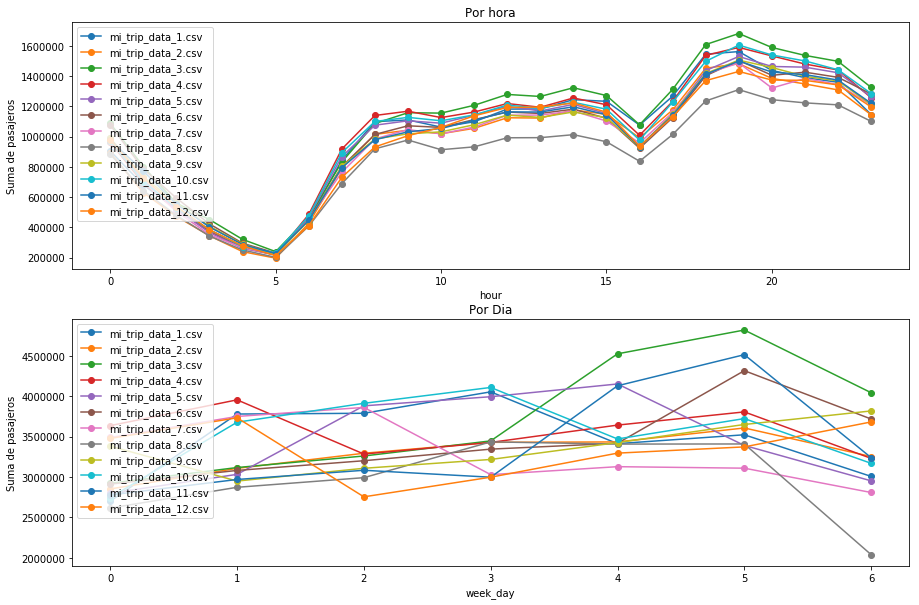

In [0]:
import matplotlib.pyplot as plt
plantilla='mi_trip_data_{:d}.csv'
archivos = [plantilla.format(k) for k in range(1,13)]
print(archivos)
for i in range(0,12):
  print(archivos[i])
  df=abre_archivoPD(archivos[i])
  df=depurado(df,archivos[i])
  df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
  df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
  df['hour']=df['pickup_datetime'].dt.hour
  df['week_day']=df['pickup_datetime'].dt.weekday
  porhora=df.groupby('hour')  
  resultado_pasajerosH=porhora['passenger_count'].sum()  
  plt.subplot(2,1,1)
  resultado_pasajerosH.plot.line(style="-o",figsize=(15,10),label=archivos[i])
  plt.ylabel("Suma de pasajeros")
  plt.title('Por hora')
  plt.legend(loc="upper left")
  porweekday=df.groupby('week_day')
  resultado_pasajerosD=porweekday['passenger_count'].sum()  
  plt.subplot(2,1,2)
  resultado_pasajerosD.plot.line(style="-o",figsize=(15,10),label=archivos[i])
  plt.ylabel("Suma de pasajeros")
  plt.title('Por Dia')
 # plt.Figure(2)
  plt.legend(loc="upper left")      
  print(i)
  
  
  

##Mapas 

In [0]:

from bokeh.models import BoxZoomTool
from bokeh.plotting import figure, output_notebook, show
from bokeh.tile_providers import STAMEN_TERRAIN
from pyproj import Proj, transform

In [0]:
##funciones encontradas en interned y adaptadas para este ejercicio
def convertCoordsPick(row):
    x2,y2 = transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'),row['pickup_longitude'],row['pickup_latitude'])
    return pd.Series([x2,y2])

def convertCoordsDrop(row):
    x2,y2 = transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'),row['dropoff_longitude'],row['dropoff_latitude'])
    return pd.Series([x2,y2])


In [0]:
#NYC = x_range, y_range = ((-74.03, -73.77),(40.63, 40.85))


#print(transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), -74.03,40.03))







In [0]:
NYC = x_range, y_range = ((-8242000,-8210000), (4965000,4990000))
plot_width  = int(750)
plot_height = int(plot_width//1.2)
def base_plot(title,tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)

    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.add_tools(BoxZoomTool(match_aspect=True))

    return p

options1 = dict(line_color=None, fill_color='blue', size=5)
options2 = dict(line_color=None, fill_color='red', size=5)
options3 = dict(line_color=None, fill_color='yellow', size=5)
options4 = dict(line_color=None, fill_color='green', size=5)
options5 = dict(line_color=None, fill_color='purple', size=5)
options6 = dict(line_color=None, fill_color='orange', size=5)
options7 = dict(line_color=None, fill_color='pink', size=5)


In [0]:
plantilla='mi_trip_data_{:d}.csv'
archivos = [plantilla.format(k) for k in range(1,13)]

for i in range(0,12):
  df = dd.read_csv(archivos[i], usecols=['medallion','pickup_datetime','pickup_longitude', 'pickup_latitude',
                                                'dropoff_longitude','dropoff_latitude'])
  muestras = df[df.medallion==best_taxis[i+1]]
  muestras['pickup_datetime']=dd.to_datetime(muestras['pickup_datetime'])
  muestras['hourp']=muestras['pickup_datetime'].dt.hour
  muestras['week_dayp']=muestras['pickup_datetime'].dt.weekday
  muestras=muestras.compute()
  muestras[['xp','yp']] = muestras.apply(convertCoordsPick,axis=1)
  muestras[['xd','yd']] = muestras.apply(convertCoordsDrop,axis=1)
  muestras0 = muestras[muestras.week_dayp == 0]
  muestras1 = muestras[muestras.week_dayp == 1]
  muestras2 = muestras[muestras.week_dayp == 2]
  muestras3 = muestras[muestras.week_dayp == 3]
  muestras4 = muestras[muestras.week_dayp == 4]
  muestras5 = muestras[muestras.week_dayp == 5]
  muestras6 = muestras[muestras.week_dayp == 6]
  output_notebook()
  titulo="mapa subidas por dia"
  p=base_plot(titulo)
  titulo="mapa bajadas por dia"
  d=base_plot(titulo)
  p.add_tile(STAMEN_TERRAIN)
  d.add_tile(STAMEN_TERRAIN)
  print("Pickups mes: ", i+1," taxi: "+best_taxis[i+1])
  p.circle(x=muestras0['xp'], y = muestras0['yp'],legend='Lunes', **options1)
  p.circle(x=muestras1['xp'], y = muestras1['yp'],legend='Martes', **options2)
  p.circle(x=muestras2['xp'], y = muestras2['yp'],legend='Miercoles', **options3)
  p.circle(x=muestras3['xp'], y = muestras3['yp'],legend='Jueves', **options4)
  p.circle(x=muestras4['xp'], y = muestras4['yp'],legend='Viernes', **options5)
  p.circle(x=muestras5['xp'], y = muestras5['yp'],legend='Sabado', **options6)
  p.circle(x=muestras6['xp'], y = muestras6['yp'],legend='Domingo', **options7)
  show(p)
  print("droppof mes:",i+1," taxi: "+best_taxis[i+1])
  d.square(x=muestras0['xd'], y = muestras0['yd'],legend='Lunes', **options1)
  d.square(x=muestras1['xd'], y = muestras1['yd'],legend='Martes', **options2)
  d.square(x=muestras2['xd'], y = muestras2['yd'],legend='Miercoles', **options3)
  d.square(x=muestras3['xd'], y = muestras3['yd'],legend='Jueves', **options4)
  d.square(x=muestras4['xd'], y = muestras4['yd'],legend='Viernes', **options5)
  d.square(x=muestras5['xd'], y = muestras5['yd'],legend='Sabado', **options6)
  d.square(x=muestras6['xd'], y = muestras6['yd'],legend='Domingo', **options7)
  show(d)

C:\Users\psicf\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\psicf\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\psicf\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

Loading BokehJS ...

Pickups mes:  1  taxi: DAF57CF25F00457CC6077CD628EC71AC


droppof mes: 1  taxi: DAF57CF25F00457CC6077CD628EC71AC


Loading BokehJS ...

Pickups mes:  2  taxi: 4E834DFB7A8831D0A5B6F9B80092A61F


droppof mes: 2  taxi: 4E834DFB7A8831D0A5B6F9B80092A61F


Loading BokehJS ...

Pickups mes:  3  taxi: 97E2116EEB09AF20718CC464A13675EB


droppof mes: 3  taxi: 97E2116EEB09AF20718CC464A13675EB


Loading BokehJS ...

Pickups mes:  4  taxi: 4E834DFB7A8831D0A5B6F9B80092A61F


droppof mes: 4  taxi: 4E834DFB7A8831D0A5B6F9B80092A61F


Loading BokehJS ...

Pickups mes:  5  taxi: 139D73A09A56D037BE7C56792C7D1FB6


droppof mes: 5  taxi: 139D73A09A56D037BE7C56792C7D1FB6


Loading BokehJS ...

Pickups mes:  6  taxi: 698A6074D905BC18FE001032FA0B2048


droppof mes: 6  taxi: 698A6074D905BC18FE001032FA0B2048


Loading BokehJS ...

Pickups mes:  7  taxi: 5466D714601371299033C01FB08BB93B


droppof mes: 7  taxi: 5466D714601371299033C01FB08BB93B


Loading BokehJS ...

Pickups mes:  8  taxi: 6BD1B641A1CD55803A21560299B985A7


droppof mes: 8  taxi: 6BD1B641A1CD55803A21560299B985A7


Loading BokehJS ...

Pickups mes:  9  taxi: 8C3DB699DA9D5A86780602001DF0892D


droppof mes: 9  taxi: 8C3DB699DA9D5A86780602001DF0892D


Loading BokehJS ...

Pickups mes:  10  taxi: D242F08982116B6C6EBEF33FBCC14513


droppof mes: 10  taxi: D242F08982116B6C6EBEF33FBCC14513


Loading BokehJS ...

Pickups mes:  11  taxi: 1239300107099B26BF07526F66C30BAF


droppof mes: 11  taxi: 1239300107099B26BF07526F66C30BAF


Loading BokehJS ...

Pickups mes:  12  taxi: BDF61165DAA42F17D35F5875F01B5C7A


droppof mes: 12  taxi: BDF61165DAA42F17D35F5875F01B5C7A


##mapas pregunta 10 y 11 por perido de rango de horas 
tanto la primera imagen es de los pickups y la segunda de los dropoff mes con mes

In [0]:
plantilla='mi_trip_data_{:d}.csv'
archivos = [plantilla.format(k) for k in range(1,13)]

for i in range(0,12):
  df = dd.read_csv(archivos[i], usecols=['medallion','pickup_datetime','pickup_longitude', 'pickup_latitude',
                                                'dropoff_longitude','dropoff_latitude'])
  muestras = df[df.medallion==best_taxis[i+1]]
  muestras['pickup_datetime']=dd.to_datetime(muestras['pickup_datetime'])
  muestras['hourp']=muestras['pickup_datetime'].dt.hour
  muestras['week_dayp']=muestras['pickup_datetime'].dt.weekday
  muestras=muestras.compute()
  muestras[['xp','yp']] = muestras.apply(convertCoordsPick,axis=1)
  muestras[['xd','yd']] = muestras.apply(convertCoordsDrop,axis=1)
  muestras4 = muestras[muestras.hourp < 4]
  muestras8 = muestras[(muestras.hourp >3) & (muestras.hourp <8)  ]
  muestras12 = muestras[(muestras.hourp >7) & (muestras.hourp <12)]
  muestras16 = muestras[(muestras.hourp >11) & (muestras.hourp <16)]
  muestras20 = muestras[(muestras.hourp >15) & (muestras.hourp <20)]
  muestras24 = muestras[muestras.hourp > 19]
  output_notebook()
  titulo="mapa subidas por dia"
  p=base_plot(titulo)
  titulo="mapa bajadas por dia"
  d=base_plot(titulo)
  p.add_tile(STAMEN_TERRAIN)
  d.add_tile(STAMEN_TERRAIN)
  print("Pickups mes: ", i+1," taxi: "+best_taxis[i+1])
  p.circle(x=muestras4['xp'], y = muestras4['yp'],legend='00:00-03:59', **options1)
  p.circle(x=muestras8['xp'], y = muestras8['yp'],legend='04:00-07:59', **options2)
  p.circle(x=muestras12['xp'], y = muestras12['yp'],legend='08:00-11:59', **options3)
  p.circle(x=muestras16['xp'], y = muestras16['yp'],legend='12:00-15:59', **options4)
  p.circle(x=muestras20['xp'], y = muestras20['yp'],legend='16:00-19:49', **options5)
  p.circle(x=muestras24['xp'], y = muestras24['yp'],legend='20:00-11:59', **options6)
  show(p)
  print("droppof mes:",i+1," taxi: "+best_taxis[i+1])
  d.square(x=muestras4['xd'], y = muestras4['yd'],legend='00:00-03:59', **options1)
  d.square(x=muestras8['xd'], y = muestras8['yd'],legend='04:00-07:59', **options2)
  d.square(x=muestras12['xd'], y = muestras12['yd'],legend='08:00-11:59', **options3)
  d.square(x=muestras16['xd'], y = muestras16['yd'],legend='12:00-15:59', **options4)
  d.square(x=muestras20['xd'], y = muestras20['yd'],legend='16:00-19:49', **options5)
  d.square(x=muestras24['xd'], y = muestras24['yd'],legend='20:00-11:59', **options6)
  show(d)

C:\Users\psicf\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\psicf\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\psicf\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

Loading BokehJS ...

Pickups mes:  1  taxi: DAF57CF25F00457CC6077CD628EC71AC


droppof mes: 1  taxi: DAF57CF25F00457CC6077CD628EC71AC


Loading BokehJS ...

Pickups mes:  2  taxi: 4E834DFB7A8831D0A5B6F9B80092A61F


droppof mes: 2  taxi: 4E834DFB7A8831D0A5B6F9B80092A61F


Loading BokehJS ...

Pickups mes:  3  taxi: 97E2116EEB09AF20718CC464A13675EB


droppof mes: 3  taxi: 97E2116EEB09AF20718CC464A13675EB


Loading BokehJS ...

Pickups mes:  4  taxi: 4E834DFB7A8831D0A5B6F9B80092A61F


droppof mes: 4  taxi: 4E834DFB7A8831D0A5B6F9B80092A61F


Loading BokehJS ...

Pickups mes:  5  taxi: 139D73A09A56D037BE7C56792C7D1FB6


droppof mes: 5  taxi: 139D73A09A56D037BE7C56792C7D1FB6


Loading BokehJS ...

Pickups mes:  6  taxi: 698A6074D905BC18FE001032FA0B2048


droppof mes: 6  taxi: 698A6074D905BC18FE001032FA0B2048


Loading BokehJS ...

Pickups mes:  7  taxi: 5466D714601371299033C01FB08BB93B


droppof mes: 7  taxi: 5466D714601371299033C01FB08BB93B


Loading BokehJS ...

Pickups mes:  8  taxi: 6BD1B641A1CD55803A21560299B985A7


droppof mes: 8  taxi: 6BD1B641A1CD55803A21560299B985A7


Loading BokehJS ...

Pickups mes:  9  taxi: 8C3DB699DA9D5A86780602001DF0892D


droppof mes: 9  taxi: 8C3DB699DA9D5A86780602001DF0892D


Loading BokehJS ...

Pickups mes:  10  taxi: D242F08982116B6C6EBEF33FBCC14513


droppof mes: 10  taxi: D242F08982116B6C6EBEF33FBCC14513


Loading BokehJS ...

Pickups mes:  11  taxi: 1239300107099B26BF07526F66C30BAF


droppof mes: 11  taxi: 1239300107099B26BF07526F66C30BAF


Loading BokehJS ...

Pickups mes:  12  taxi: BDF61165DAA42F17D35F5875F01B5C7A


droppof mes: 12  taxi: BDF61165DAA42F17D35F5875F01B5C7A
